Imports and notebook settings

In [1]:
import string
import pandas as pd
import geopandas as gpd
import maup
import time

In [2]:
import pickle

In [3]:
maup.progress.enabled = True

Modularized code from IL_MAUP.ipynb from lecture

In [4]:
def read_shape_file(filename: string) -> gpd.GeoDataFrame:
    start_time = time.time()
    df = gpd.read_file(filename)
    end_time = time.time()
    print(f"The time to import {filename} is: {(end_time - start_time) / 60} mins")
    return df

Read shapfile data from sources. Replace with your local path the downloaded data.

This analysis was conducted using data from the Redistricting Data Hub.
https://redistrictingdatahub.org/state/louisiana/#types

In [8]:
population_filepath = "~/Downloads/la_pl2020_b/la_pl2020_p2_b.shp"
vap_filepath = "~/Downloads/la_pl2020_b/la_pl2020_p4_b.shp"
election_filepath = "~/Downloads/la_vest_20/la_vest_20.shp"
cong_filepath = "~/Downloads/la_cong_adopted_2024/Act_2_1st_ES_(2024)_-_Congress.shp"

In [9]:
population_df = read_shape_file(population_filepath)
vap_df = read_shape_file(vap_filepath)
election_df = read_shape_file(election_filepath)
cong_df = read_shape_file(cong_filepath)

The time to import ~/Downloads/la_pl2020_b/la_pl2020_p2_b.shp is: 3.304664687315623 mins
The time to import ~/Downloads/la_pl2020_b/la_pl2020_p4_b.shp is: 3.3844216664632163 mins
The time to import ~/Downloads/la_vest_20/la_vest_20.shp is: 0.04702748457590739 mins
The time to import ~/Downloads/la_cong_adopted_2024/Act_2_1st_ES_(2024)_-_Congress.shp is: 0.007079819838205974 mins


Save initial dataframes to avoid rerunning lengthy import (cell above)

In [10]:
dataframes = {"population": population_df,
              "vap": vap_df,
              "election": election_df,
              "cong": cong_df,}

See https://www.datacamp.com/tutorial/pickle-python-tutorial for the pickle code

In [11]:
with open('lab-04_dataframe.pkl', 'wb') as f:
    pickle.dump(dataframes, f)

Investigate initial dataframes (e.g. column names, shape, etc)

In [12]:
print(population_df.columns)
print(vap_df.columns)
print(election_df.columns)
print(cong_df.columns)

Index(['GEOID20', 'SUMLEV', 'LOGRECNO', 'GEOID', 'COUNTY', 'P0020001',
       'P0020002', 'P0020003', 'P0020004', 'P0020005', 'P0020006', 'P0020007',
       'P0020008', 'P0020009', 'P0020010', 'P0020011', 'P0020012', 'P0020013',
       'P0020014', 'P0020015', 'P0020016', 'P0020017', 'P0020018', 'P0020019',
       'P0020020', 'P0020021', 'P0020022', 'P0020023', 'P0020024', 'P0020025',
       'P0020026', 'P0020027', 'P0020028', 'P0020029', 'P0020030', 'P0020031',
       'P0020032', 'P0020033', 'P0020034', 'P0020035', 'P0020036', 'P0020037',
       'P0020038', 'P0020039', 'P0020040', 'P0020041', 'P0020042', 'P0020043',
       'P0020044', 'P0020045', 'P0020046', 'P0020047', 'P0020048', 'P0020049',
       'P0020050', 'P0020051', 'P0020052', 'P0020053', 'P0020054', 'P0020055',
       'P0020056', 'P0020057', 'P0020058', 'P0020059', 'P0020060', 'P0020061',
       'P0020062', 'P0020063', 'P0020064', 'P0020065', 'P0020066', 'P0020067',
       'P0020068', 'P0020069', 'P0020070', 'P0020071', 'P002

In [13]:
print(population_df.shape)
print(vap_df.shape)
print(election_df.shape)
print(cong_df.shape)

(142874, 79)
(142874, 79)
(3753, 25)
(6, 9)


In [14]:
print(cong_df)

   OBJECTID  DISTRICT_I        NAME  NUM_MEMBER  IDEAL_POP  IS_LOCKED  \
0         1           1  District 1           1     776292          0   
1         2           2  District 2           1     776292          1   
2         3           3  District 3           1     776292          0   
3         4           4  District 4           1     776292          0   
4         5           5  District 5           1     776292          0   
5         6           6  District 6           1     776292          0   

   SHAPE_AREA  SHAPE_LEN                                           geometry  
0    2.052146  13.040607  POLYGON ((-90.25170 30.71172, -90.24707 30.710...  
1    0.578006   8.192319  POLYGON ((-91.67661 30.49756, -91.67506 30.497...  
2    2.568008  13.348879  POLYGON ((-91.65466 30.45434, -91.64773 30.449...  
3    3.712209  24.135723  POLYGON ((-93.90428 33.01957, -93.90115 33.019...  
4    2.657801  20.480358  POLYGON ((-92.04496 33.00775, -92.03708 33.007...  
5    1.233560  17.40

In [15]:
cong_df.dtypes

OBJECTID         int64
DISTRICT_I       int64
NAME            object
NUM_MEMBER       int64
IDEAL_POP        int64
IS_LOCKED        int64
SHAPE_AREA     float64
SHAPE_LEN      float64
geometry      geometry
dtype: object

In [16]:
district_col_name = "DISTRICT_I"

Assign blocks to precincts

In [17]:
blocks_to_precincts_assignment = maup.assign(population_df.geometry, election_df.geometry)
vap_blocks_to_precincts_assignment = maup.assign(vap_df.geometry, election_df.geometry)

100%|██████████████████████████████████████| 3753/3753 [00:04<00:00, 935.22it/s]
/Users/travisoleson/anaconda3/envs/gerry/lib/python3.12/site-packages/maup/intersections.py:47: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  df = df[df.area > area_cutoff].reset_index(drop=True)
/Users/travisoleson/anaconda3/envs/gerry/lib/python3.12/site-packages/maup/intersections.py:48: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  geometries = geometries[geometries.area > area_cutoff]
/Users/travisoleson/anaconda3/envs/gerry/lib/python3.12/site-packages/maup/assign.py:38: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before

Assign population columns of interest to election dataframe

In [18]:
pop_column_names = ['P0020001', 'P0020002', 'P0020005', 'P0020006', 'P0020007',
                    'P0020008', 'P0020009', 'P0020010', 'P0020011']

In [19]:
vap_column_names = ['P0040001', 'P0040002', 'P0040005', 'P0040006', 'P0040007',
                    'P0040008', 'P0040009', 'P0040010', 'P0040011']

In [20]:
for name in pop_column_names:
    election_df[name] = population_df[name].groupby(blocks_to_precincts_assignment).sum()
for name in vap_column_names:
    election_df[name] = vap_df[name].groupby(vap_blocks_to_precincts_assignment).sum()

Verify no population loss

In [21]:
print(population_df['P0020001'].sum())
print(election_df['P0020001'].sum())
print(vap_df['P0040001'].sum())
print(election_df['P0040001'].sum())

4657757
4657757
3570548
3570548


In [24]:
health_check = maup.doctor(election_df)

100%|██████████████████████████████████████| 3753/3753 [00:13<00:00, 283.10it/s]
/Users/travisoleson/anaconda3/envs/gerry/lib/python3.12/site-packages/maup/repair.py:331: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  overlaps = inters[inters.area > 0].make_valid()


There are 1 holes.


In [27]:
election_df = election_df.to_crs(population_df.estimate_utm_crs())
vap_df = vap_df.to_crs(population_df.estimate_utm_crs())
cong_df = cong_df.to_crs(population_df.estimate_utm_crs())

In [28]:
if not health_check:
    election_df = maup.smart_repair(election_df)

/Users/travisoleson/anaconda3/envs/gerry/lib/python3.12/site-packages/maup/smart_repair.py:95: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  geometries_df["geometry"][i] = shapely.wkb.loads(
/Users/travisoleson/anaconda3/envs/gerry/lib/pytho

Snapping all geometries to a grid with precision 10^( -5 ) to avoid GEOS errors.


/Users/travisoleson/anaconda3/envs/gerry/lib/python3.12/site-packages/maup/smart_repair.py:372: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  pieces_df["polygon indices"][i] = set()


Identifying overlaps...


  0%|                                                  | 0/3798 [00:00<?, ?it/s]/Users/travisoleson/anaconda3/envs/gerry/lib/python3.12/site-packages/maup/smart_repair.py:415: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  pieces_df["polygon 

Resolving overlaps...


/Users/travisoleson/anaconda3/envs/gerry/lib/python3.12/site-packages/maup/smart_repair.py:496: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  geometries_df["num components orig"][ind] = num_components(geometries0_df["geometry"][ind])
/Users/

Assigning order 2 pieces...


/Users/travisoleson/anaconda3/envs/gerry/lib/python3.12/site-packages/maup/smart_repair.py:563: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  geometries_df["geometry"][poly_to_add_to] = unary_union(


Filling gaps...


Gaps to simplify: 0it [00:00, ?it/s]
Gaps to fill: 0it [00:00, ?it/s]


In [34]:
population_df = population_df.to_crs(population_df.estimate_utm_crs())
election_df = election_df.to_crs(population_df.estimate_utm_crs())
vap_df = vap_df.to_crs(population_df.estimate_utm_crs())
cong_df = cong_df.to_crs(population_df.estimate_utm_crs())

In [35]:
blocks_to_precincts_assignment = maup.assign(population_df.geometry, election_df.geometry)
vap_blocks_to_precincts_assignment = maup.assign(vap_df.geometry, election_df.geometry)

100%|███████████████████████████████████████| 3753/3753 [01:40<00:00, 37.31it/s]


In [36]:
health_check = maup.doctor(election_df)
print(health_check)

100%|██████████████████████████████████████| 3753/3753 [00:15<00:00, 239.68it/s]


True


Add district assignment to dataframe

In [37]:
precincts_to_districts_assignment = maup.assign(election_df["geometry"], cong_df["geometry"])
election_df["CD"] = precincts_to_districts_assignment

100%|█████████████████████████████████████████████| 6/6 [00:27<00:00,  4.67s/it]


In [38]:
print(set(election_df["CD"]))
for precinct_index in range(len(election_df)):
    election_df.at[precinct_index, "CD"] = cong_df.at[election_df.at[precinct_index, "CD"], district_col_name]
print(set(cong_df[district_col_name]))
print(set(election_df["CD"]))

{0, 1, 2, 3, 4, 5}
{1, 2, 3, 4, 5, 6}
{1, 2, 3, 4, 5, 6}


In [39]:
rename_dict = {'P0020001': 'TOTPOP', 'P0020002': 'HISP', 'P0020005': 'NH_WHITE', 'P0020006': 'NH_BLACK', 'P0020007': 'NH_AMIN',
                    'P0020008': 'NH_ASIAN', 'P0020009': 'NH_NHPI', 'P0020010': 'NH_OTHER', 'P0020011': 'NH_2MORE',
                    'P0040001': 'VAP', 'P0040002': 'HVAP', 'P0040005': 'WVAP', 'P0040006': 'BVAP', 'P0040007': 'AMINVAP',
                                        'P0040008': 'ASIANVAP', 'P0040009': 'NHPIVAP', 'P0040010': 'OTHERVAP', 'P0040011': '2MOREVAP',
                                        'G20PREDBID': 'G20PRED', 'G20PRERTRU': 'G20PRER', 'G20USSDDUR': 'G20USSD', 
                                        'G20USSRCUR': 'G20USSR'}

In [40]:
list(election_df.columns)

['STATEFP',
 'COUNTYFP',
 'VTDST',
 'NAME',
 'G20PRERTRU',
 'G20PREDBID',
 'G20PRELJOR',
 'G20PREOWES',
 'G20PREOOTH',
 'G20USSRCAS',
 'G20USSRMUR',
 'G20USSDPER',
 'G20USSDEDW',
 'G20USSDPIE',
 'G20USSDKNI',
 'G20USSDWEN',
 'G20USSLSIG',
 'G20USSIMEN',
 'G20USSOPRI',
 'G20USSOJOH',
 'G20USSNBIL',
 'G20USSNBOU',
 'G20USSNMON',
 'G20USSNDAR',
 'geometry',
 'P0020001',
 'P0020002',
 'P0020005',
 'P0020006',
 'P0020007',
 'P0020008',
 'P0020009',
 'P0020010',
 'P0020011',
 'P0040001',
 'P0040002',
 'P0040005',
 'P0040006',
 'P0040007',
 'P0040008',
 'P0040009',
 'P0040010',
 'P0040011',
 'CD']

In [43]:
election_df.rename(columns=rename_dict, inplace = True)
list(election_df.columns)

['STATEFP',
 'COUNTYFP',
 'VTDST',
 'NAME',
 'G20PRER',
 'G20PRED',
 'G20PRELJOR',
 'G20PREOWES',
 'G20PREOOTH',
 'G20USSRCAS',
 'G20USSRMUR',
 'G20USSDPER',
 'G20USSDEDW',
 'G20USSDPIE',
 'G20USSDKNI',
 'G20USSDWEN',
 'G20USSLSIG',
 'G20USSIMEN',
 'G20USSOPRI',
 'G20USSOJOH',
 'G20USSNBIL',
 'G20USSNBOU',
 'G20USSNMON',
 'G20USSNDAR',
 'geometry',
 'TOTPOP',
 'HISP',
 'NH_WHITE',
 'NH_BLACK',
 'NH_AMIN',
 'NH_ASIAN',
 'NH_NHPI',
 'NH_OTHER',
 'NH_2MORE',
 'VAP',
 'HVAP',
 'WVAP',
 'BVAP',
 'AMINVAP',
 'ASIANVAP',
 'NHPIVAP',
 'OTHERVAP',
 '2MOREVAP',
 'CD']

In [44]:
election_df.drop(columns=['G20PRELJOR', 'G20PREOWES', 'G20PREOOTH', 'G20USSLSIG', 'G20USSIMEN', 'G20USSOPRI', 'G20USSOJOH', 'G20USSNBIL', 'G20USSNBOU', 'G20USSNMON','G20USSNDAR',], inplace=True)
list(election_df.columns)

['STATEFP',
 'COUNTYFP',
 'VTDST',
 'NAME',
 'G20PRER',
 'G20PRED',
 'G20USSRCAS',
 'G20USSRMUR',
 'G20USSDPER',
 'G20USSDEDW',
 'G20USSDPIE',
 'G20USSDKNI',
 'G20USSDWEN',
 'geometry',
 'TOTPOP',
 'HISP',
 'NH_WHITE',
 'NH_BLACK',
 'NH_AMIN',
 'NH_ASIAN',
 'NH_NHPI',
 'NH_OTHER',
 'NH_2MORE',
 'VAP',
 'HVAP',
 'WVAP',
 'BVAP',
 'AMINVAP',
 'ASIANVAP',
 'NHPIVAP',
 'OTHERVAP',
 '2MOREVAP',
 'CD']

<Axes: >

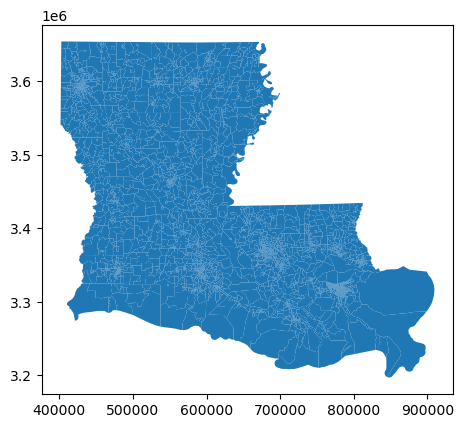

In [45]:
election_df.plot()

In [46]:
print(election_df.loc[election_df["CD"] == 1, "TOTPOP"].sum())
print(election_df.loc[election_df["CD"] == 2, "TOTPOP"].sum())
pop_vals = [election_df.loc[election_df["CD"] == n, "TOTPOP"].sum() for n in range(1, 18)]
print(pop_vals)

777807
774002
[777807, 774002, 774826, 778180, 777183, 775759, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [47]:
final_dataframes = {"population": population_df,
                      "vap": vap_df,
                      "election": election_df,
                      "cong": cong_df,}

In [48]:
with open('lab-04_final_dataframes.pkl', 'wb') as f:
    pickle.dump(dataframes, f)

In [52]:
election_df.to_file("./LA/LA.shp")
shp_file = gpd.read_file('./LA/LA.shp')
shp_file.to_file('./LA/LA.geojson', driver='GeoJSON')